In [115]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
import math

In [116]:
url="https://raw.githubusercontent.com/arturofgarza/machine-learning-python-template/cf910596d89c26a5a6377ec831b8edefbd5d66ce/Aquifer_Petrignano.csv"

In [117]:
data=pd.read_csv(url)

In [118]:
data

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [119]:
#Cambiamos indices a fechas, eliminamos columnas no necesarias para el estudio y simplificamos nuestras columnas

data = data[data.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
data = data.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)
data.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']


In [120]:
from datetime import datetime, date 

data['date'] = pd.to_datetime(data['date'], format = '%d/%m/%Y')
data.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-29854.656000,2.300000


In [121]:
data

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...,...
4194,2020-06-26,0.0,-25.07,25.7,-29930.688,2.5
4195,2020-06-27,0.0,-25.11,26.2,-31332.960,2.4
4196,2020-06-28,0.0,-25.19,26.9,-32120.928,2.4
4197,2020-06-29,0.0,-25.18,26.9,-30602.880,2.4


In [122]:
#Vamos a definir nuestro objetivo y nuestras caracteristicas o variables independientes
objetivo = ['depth_to_groundwater']
caracteristicas = [caracteristica for caracteristica in data.columns if caracteristica not in objetivo]

/tmp/ipykernel_756/4124443958.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=data['date'], y=data[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
/tmp/ipykernel_756/4124443958.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=data['date'], y=data[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
/tmp/ipykernel_756/4124443958.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=data['date'], y=data[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
/tmp/ipykernel_756/4124443958.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=data['d

/tmp/ipykernel_756/4124443958.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=data['date'], y=data[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')


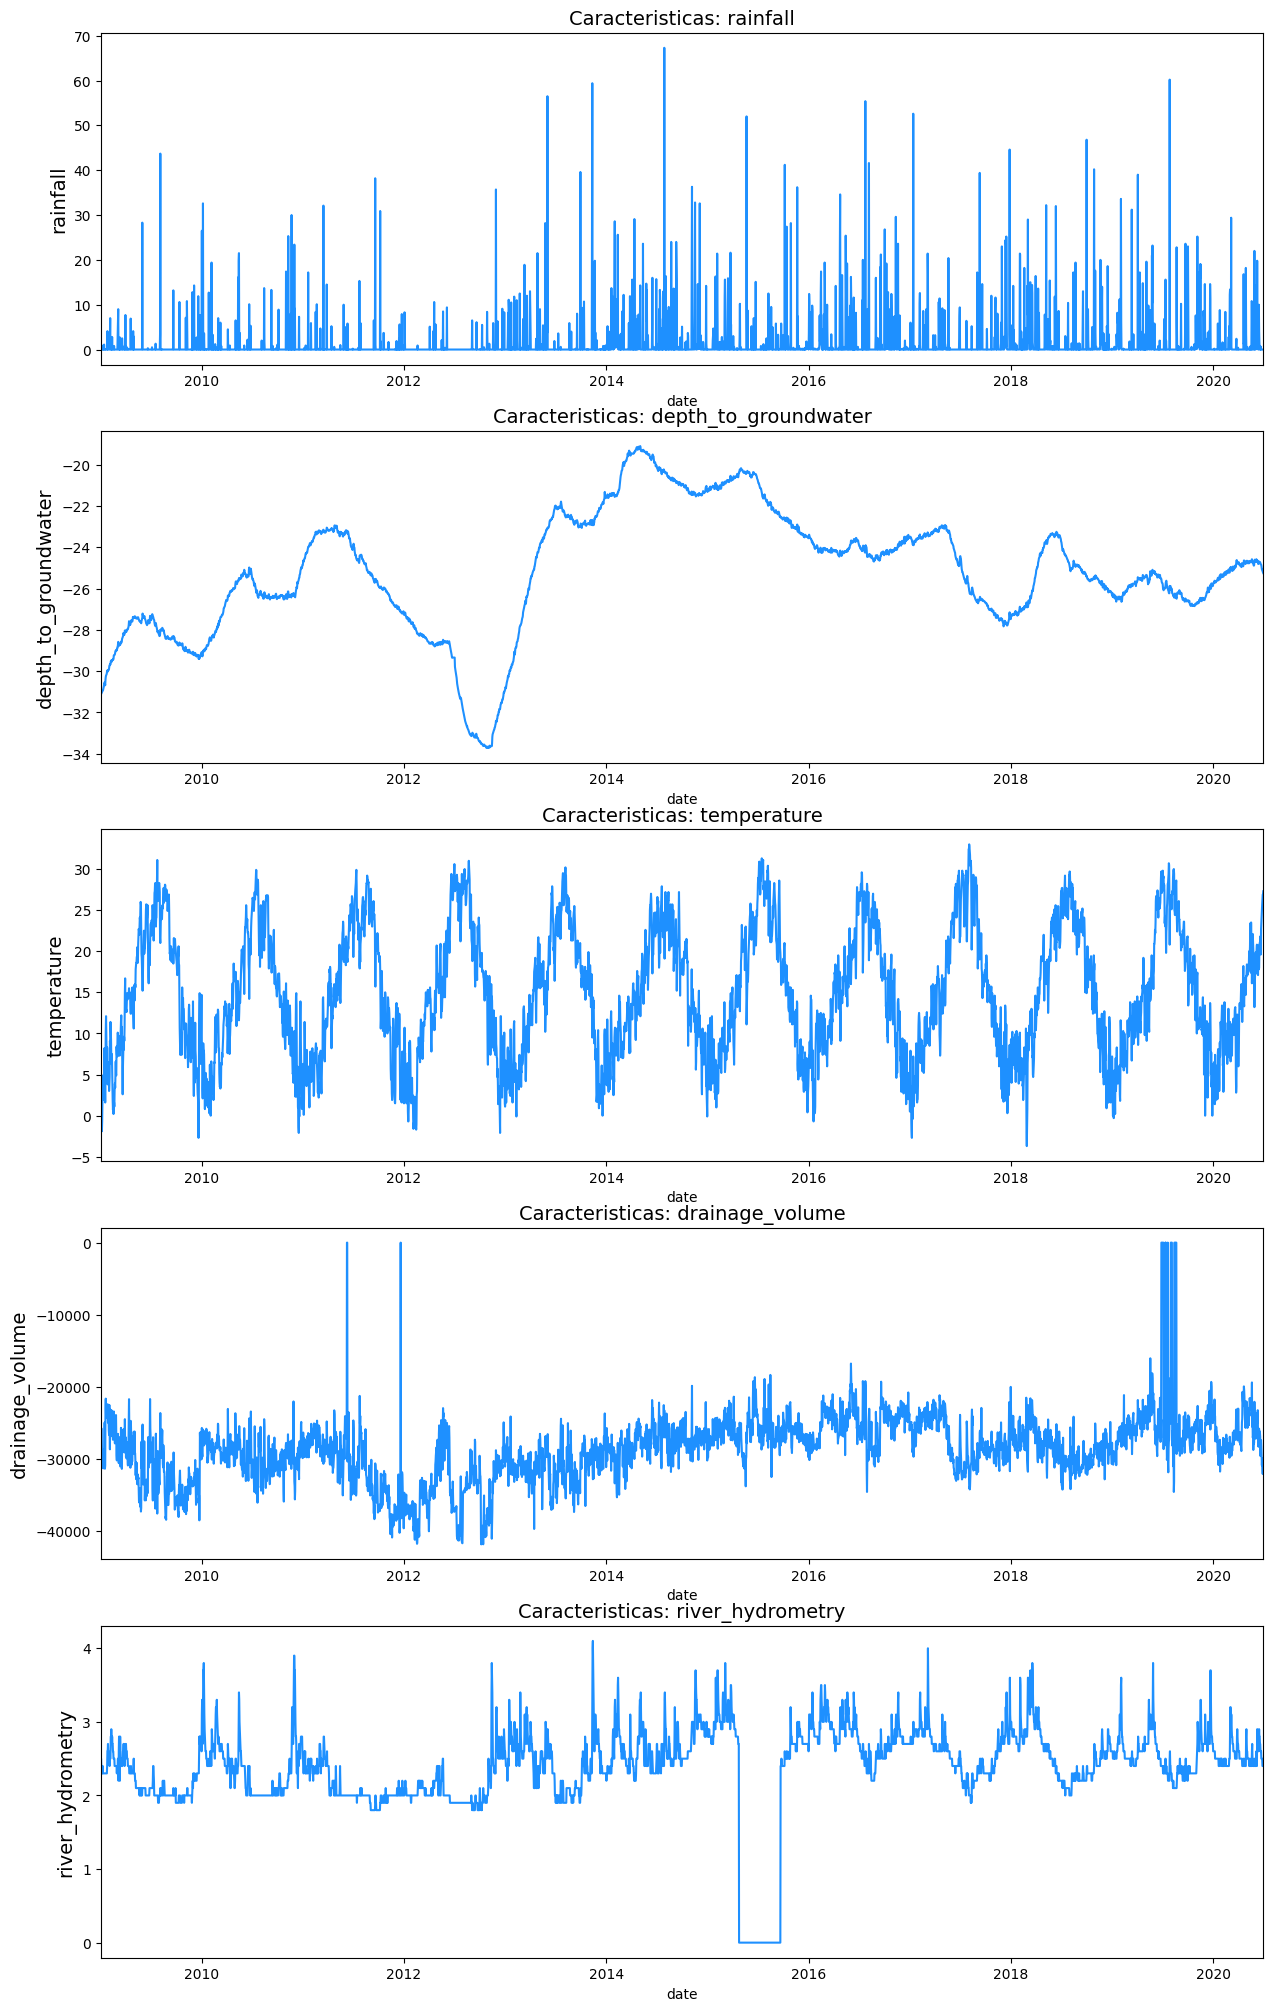

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(data.drop('date', axis=1).columns):
    sns.lineplot(x=data['date'], y=data[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Caracteristicas: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])   

In [124]:
data.isna().sum()

date                     0
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometry         0
dtype: int64

Estas graficas junto con la linea anterior nos muestran la presencia de valores nulos. Es momento de ver como trabajar con ellos.

Las tres maneras serian rellenar con la media, con el comando ffill que llena el espacio con el valor anterior e interpolar que por default viene en linear.

In [125]:
#Cambiamos valores 0 a NaN

data['river_hydrometry'] = data['river_hydrometry'].replace(0, np.nan)
data['drainage_volume'] = data['drainage_volume'].replace(0, np.nan)


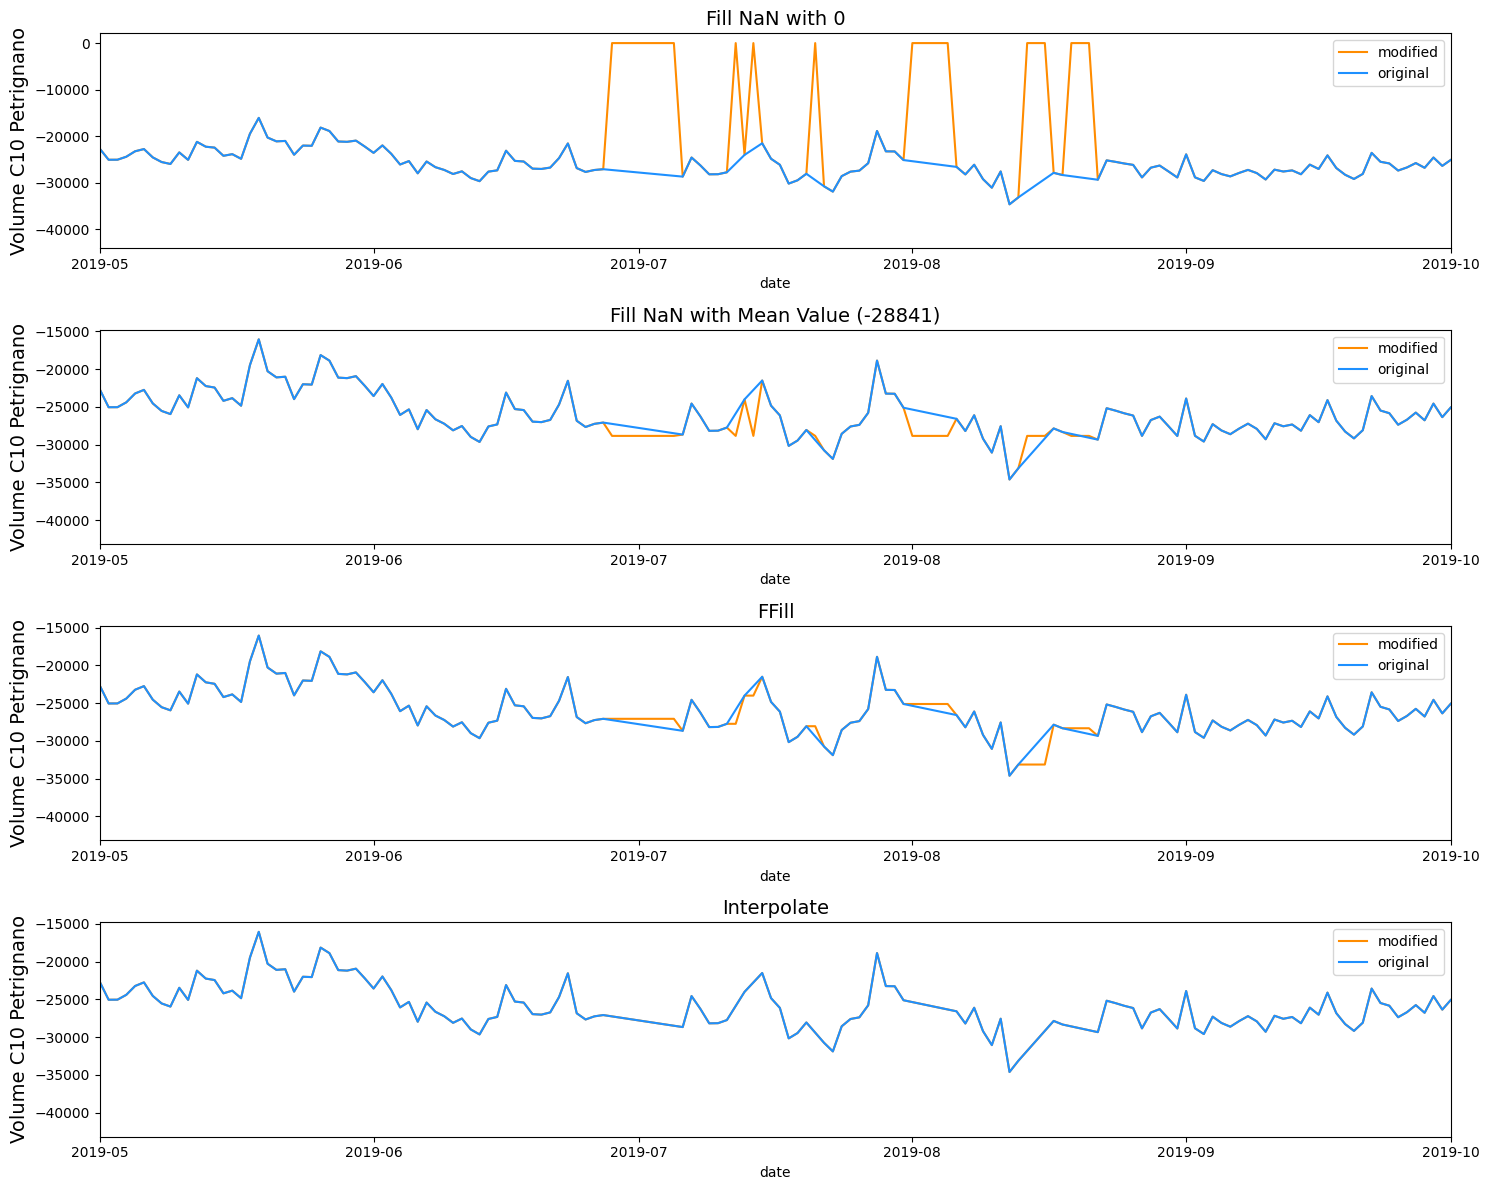

In [126]:
#No salio la grafica como se mostraba en el ejemplo pero se entiende el punto. 
#Tenemos las visualizaciones para llenar los NaN con 0, con la media, con el valor inmediato anterior y con el metodo de interpolacion

f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=data['date'], y=data['drainage_volume'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=data['date'], y=data['drainage_volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_drainage = data['drainage_volume'].mean()
sns.lineplot(x=data['date'], y=data['drainage_volume'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=data['date'], y=data['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=data['date'], y=data['drainage_volume'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=data['date'], y=data['drainage_volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=data['date'], y=data['drainage_volume'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=data['date'], y=data['drainage_volume'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()


Usaremos ffill

In [127]:
data['drainage_volume'] = data['drainage_volume'].ffill()
data['river_hydrometry'] = data['river_hydrometry'].ffill()
data['depth_to_groundwater'] = data['depth_to_groundwater'].ffill()

Suavisado de datos a traves del resample que nos ayudara a tener una mejor visualización de los datos sin tanto ruido y mejorar el analisis 

/tmp/ipykernel_756/867229122.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampleado = data[['date','drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
/tmp/ipykernel_756/867229122.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampleado = data[['date','temperature']].resample('M', on='date').mean().reset_index(drop=False)


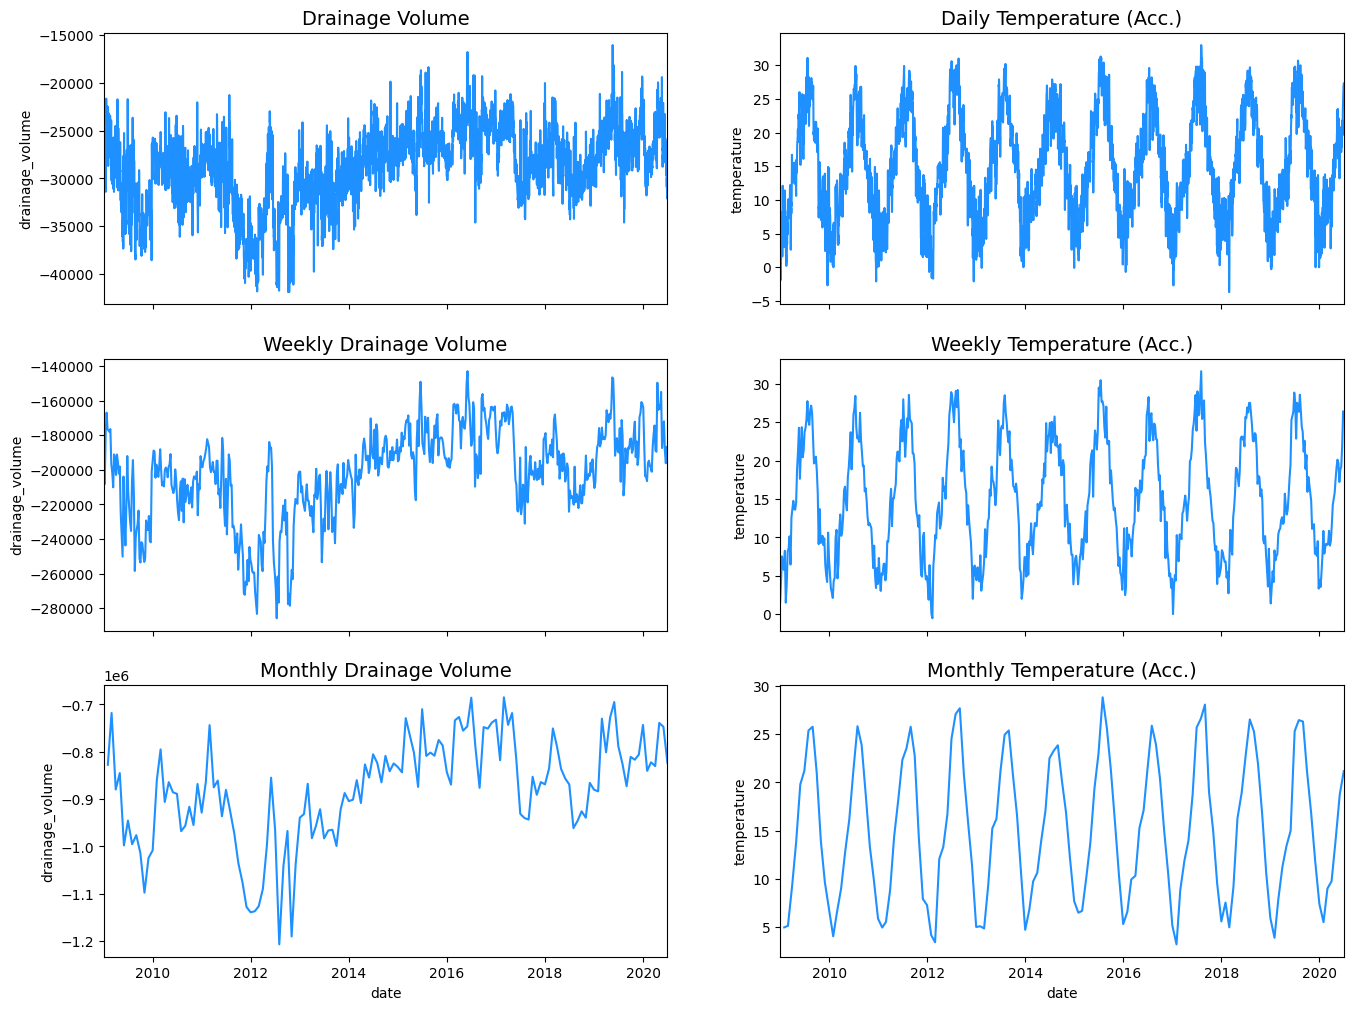

In [128]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(x=data['date'], y=data['drainage_volume'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Drainage Volume', fontsize=14)

data_resampleado = data[['date','drainage_volume']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(x=data_resampleado['date'], y=data_resampleado['drainage_volume'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Drainage Volume', fontsize=14)

data_resampleado = data[['date','drainage_volume']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(x=data_resampleado['date'], y=data_resampleado['drainage_volume'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Drainage Volume', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=data['date'], y=data['temperature'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Temperature (Acc.)', fontsize=14)

data_resampleado = data[['date','temperature']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(x=data_resampleado['date'], y=data_resampleado['temperature'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Temperature (Acc.)', fontsize=14)

data_resampleado = data[['date','temperature']].resample('M', on='date').mean().reset_index(drop=False)
sns.lineplot(x=data_resampleado['date'], y=data_resampleado['temperature'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Temperature (Acc.)', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

podemos observar que al modificar el sampleo en cuestion del tiempo se puede trabajar bien con los datos agrupados semanalmente

In [129]:
data_rebajado=data[['date','depth_to_groundwater','temperature','drainage_volume','river_hydrometry','rainfall']].resample('7D', on='date').mean().reset_index(drop=False)

data=data_rebajado

In [130]:
#ya lo podemos ver cada 8 dias

data

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,rainfall
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286
...,...,...,...,...,...,...
595,2020-05-28,-24.697143,17.214286,-25591.062857,2.414286,3.514286
596,2020-06-04,-24.638571,18.785714,-24567.099429,2.628571,6.600000
597,2020-06-11,-24.751429,19.200000,-26998.518857,2.771429,2.857143
598,2020-06-18,-24.822857,21.942857,-28030.134857,2.600000,0.200000


Usando la prueba de ADFULLER podemos revisar si cuenta con estacionalidad el fenomeno estudiado. un palor inferior a 0.05 hiponesis nula seria que no es estacionaria, alternativa que es estacionaria

In [131]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['depth_to_groundwater'])
result

(np.float64(-3.098165286840181),
 np.float64(0.026689263749966684),
 6,
 593,
 {'1%': np.float64(-3.4414256033746606),
  '5%': np.float64(-2.8664262627821473),
  '10%': np.float64(-2.569372254520843)},
 np.float64(-722.23429154102))

In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'rainfall', 'temperature', 'drainage_volume', 
    'river_hydrometry', 'depth_to_groundwater'
]

for column in core_columns:
    decomp = seasonal_decompose(data[column], period=52, model='additive', extrapolate_trend='freq')
    data[f"{column}_trend"] = decomp.trend
    data[f"{column}_seasonal"] = decomp.seasonal

In [133]:
data

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,rainfall,rainfall_trend,rainfall_seasonal,temperature_trend,temperature_seasonal,drainage_volume_trend,drainage_volume_seasonal,river_hydrometry_trend,river_hydrometry_seasonal,depth_to_groundwater_trend,depth_to_groundwater_seasonal
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000,0.806294,0.688948,15.329959,-9.739920,-32404.467037,1549.884118,2.164913,0.202262,-29.571657,-0.643924
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714,0.809093,-0.728055,15.312814,-9.838787,-32374.371773,936.619448,2.167252,0.181241,-29.535110,-0.572235
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571,0.811892,-0.717139,15.295668,-10.002955,-32344.276508,830.751844,2.169592,0.100138,-29.498564,-0.484433
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714,0.814691,0.493481,15.278522,-9.973161,-32314.181244,516.715840,2.171931,0.126708,-29.462017,-0.417865
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286,0.817490,-0.556499,15.261377,-10.246938,-32284.085980,236.545155,2.174270,0.147382,-29.425470,-0.363055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2020-05-28,-24.697143,17.214286,-25591.062857,2.414286,3.514286,1.812010,-0.679552,16.236822,6.614221,-25142.489395,717.836813,2.541073,-0.064367,-25.936634,1.171268
596,2020-06-04,-24.638571,18.785714,-24567.099429,2.628571,6.600000,1.808010,0.407384,16.250282,7.359927,-25113.676089,-101.158828,2.541325,-0.036675,-25.938172,1.132154
597,2020-06-11,-24.751429,19.200000,-26998.518857,2.771429,2.857143,1.804010,-0.921533,16.263742,7.979350,-25084.862783,-81.913656,2.541577,-0.112143,-25.939711,1.030709
598,2020-06-18,-24.822857,21.942857,-28030.134857,2.600000,0.200000,1.800010,-1.161525,16.277202,9.269845,-25056.049477,-590.104749,2.541828,-0.159825,-25.941249,0.936882


In [134]:

ts_diff = np.diff(data['depth_to_groundwater'])
data['depth_to_groundwater_diff_1'] = np.append([0], ts_diff)

In [135]:
weeks_in_month = 4

for column in core_columns:
    data[f'{column}_seasonal_shift_b_2m'] = data[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    data[f'{column}_seasonal_shift_b_1m'] = data[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    data[f'{column}_seasonal_shift_1m'] = data[f'{column}_seasonal'].shift(1 * weeks_in_month)
    data[f'{column}_seasonal_shift_2m'] = data[f'{column}_seasonal'].shift(2 * weeks_in_month)
    data[f'{column}_seasonal_shift_3m'] = data[f'{column}_seasonal'].shift(3 * weeks_in_month)

In [136]:
data

,date,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,rainfall,rainfall_trend,rainfall_seasonal,temperature_trend,temperature_seasonal,...,river_hydrometry_seasonal_shift_b_2m,river_hydrometry_seasonal_shift_b_1m,river_hydrometry_seasonal_shift_1m,river_hydrometry_seasonal_shift_2m,river_hydrometry_seasonal_shift_3m,depth_to_groundwater_seasonal_shift_b_2m,depth_to_groundwater_seasonal_shift_b_1m,depth_to_groundwater_seasonal_shift_1m,depth_to_groundwater_seasonal_shift_2m,depth_to_groundwater_seasonal_shift_3m
0,2009-01-01,-31.048571,1.657143,-28164.918857,2.371429,0.000000,0.806294,0.688948,15.329959,-9.739920,...,0.201269,0.147382,NaN,NaN,NaN,0.066180,-0.363055,NaN,NaN,NaN
1,2009-01-08,-30.784286,4.571429,-29755.789714,2.314286,0.285714,0.809093,-0.728055,15.312814,-9.838787,...,0.205517,0.230042,NaN,NaN,NaN,0.202869,-0.276060,NaN,NaN,NaN
2,2009-01-15,-30.420000,7.528571,-25463.190857,2.300000,0.028571,0.811892,-0.717139,15.295668,-10.002955,...,0.313108,0.306852,NaN,NaN,NaN,0.304651,-0.212958,NaN,NaN,NaN
3,2009-01-22,-30.018571,6.214286,-23854.422857,2.500000,0.585714,0.814691,0.493481,15.278522,-9.973161,...,0.287332,0.255240,NaN,NaN,NaN,0.406975,-0.103722,NaN,NaN,NaN
4,2009-01-29,-29.790000,5.771429,-25210.532571,2.500000,1.414286,0.817490,-0.556499,15.261377,-10.246938,...,0.195014,0.201269,0.202262,NaN,NaN,0.544450,0.066180,-0.643924,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2020-05-28,-24.697143,17.214286,-25591.062857,2.414286,3.514286,1.812010,-0.679552,16.236822,6.614221,...,NaN,-0.191375,0.127660,0.023590,0.287332,NaN,0.683152,1.150923,0.873028,0.406975
596,2020-06-04,-24.638571,18.785714,-24567.099429,2.628571,6.600000,1.808010,0.407384,16.250282,7.359927,...,NaN,NaN,0.056164,0.013255,0.195014,NaN,NaN,1.125015,0.959181,0.544450
597,2020-06-11,-24.751429,19.200000,-26998.518857,2.771429,2.857143,1.804010,-0.921533,16.263742,7.979350,...,NaN,NaN,0.041525,0.043499,0.172831,NaN,NaN,1.214111,1.072794,0.647143
598,2020-06-18,-24.822857,21.942857,-28030.134857,2.600000,0.200000,1.800010,-1.161525,16.277202,9.269845,...,NaN,NaN,0.019984,0.082100,0.092258,NaN,NaN,1.229831,1.124610,0.785136


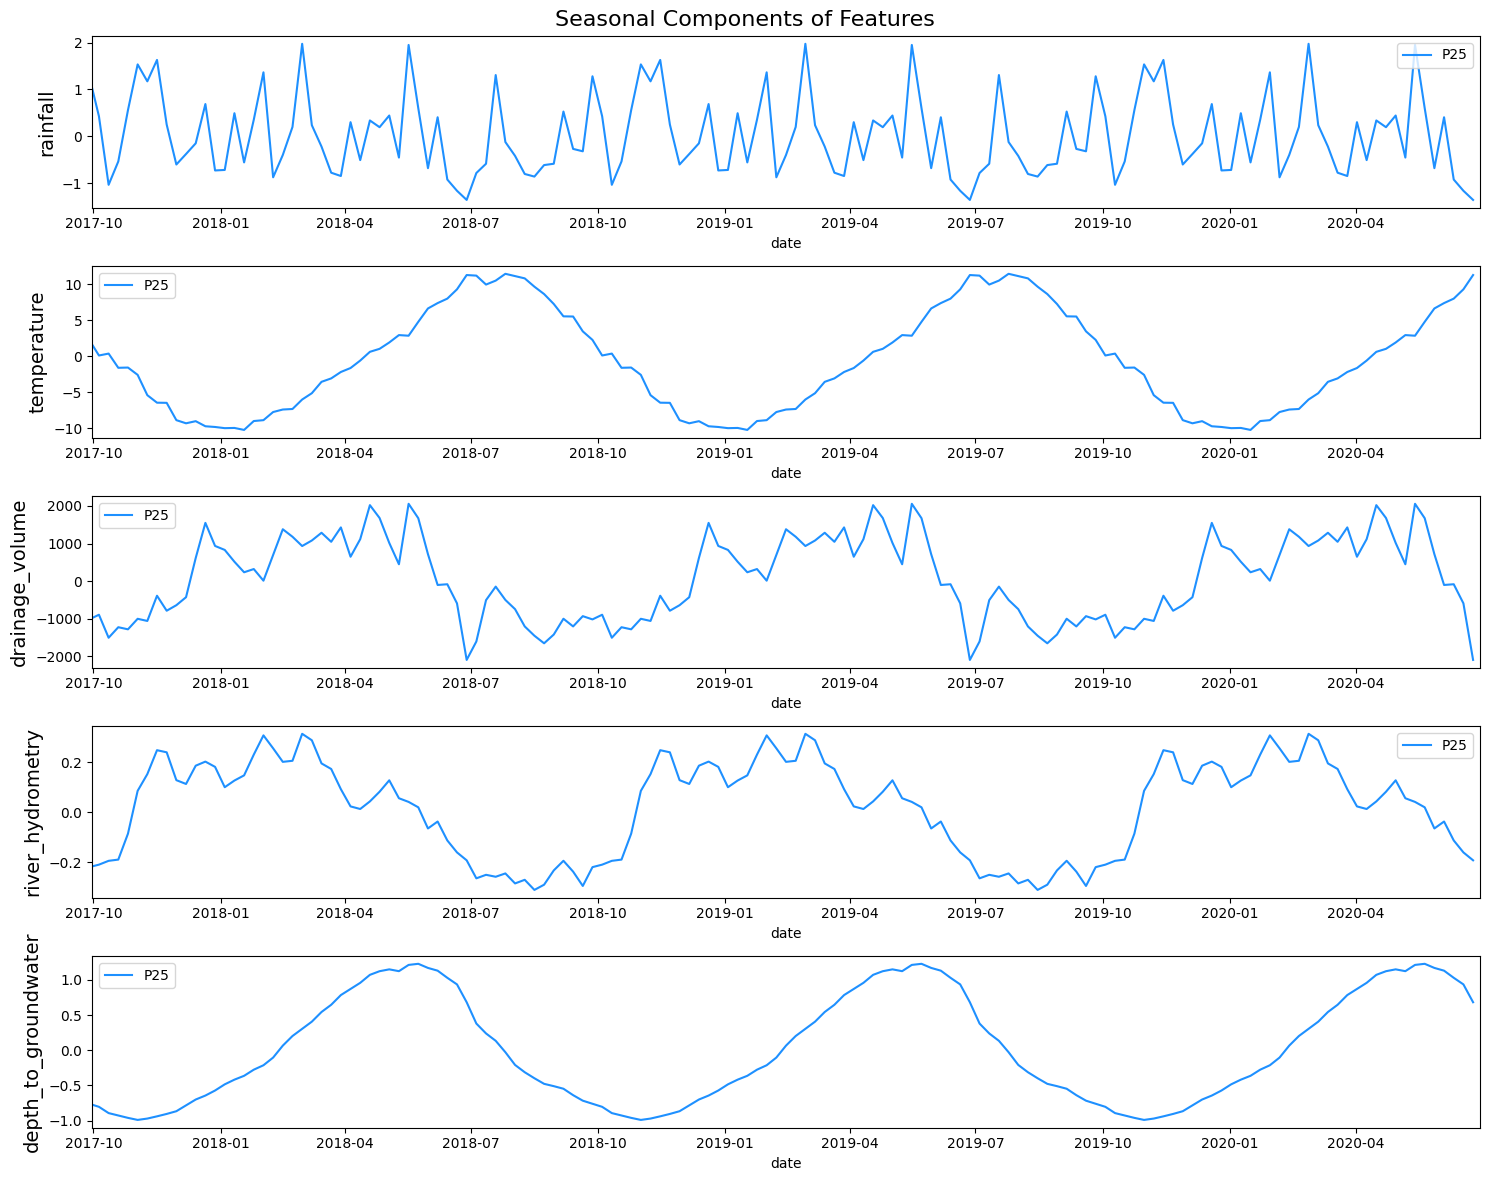

In [137]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=data['date'], y=data[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

Como podemos observar depth_to_groundwater alcanza sus minimos por el mes de Noviembre y sus máximos por Junio, draigane volume alcanza sus minimos en julio, temperatura tiene marcado sus minimos en Enero y maximos en agosto y por ultimo river hydrometry sus maximos por febrero y minimos en agosto-septiembre

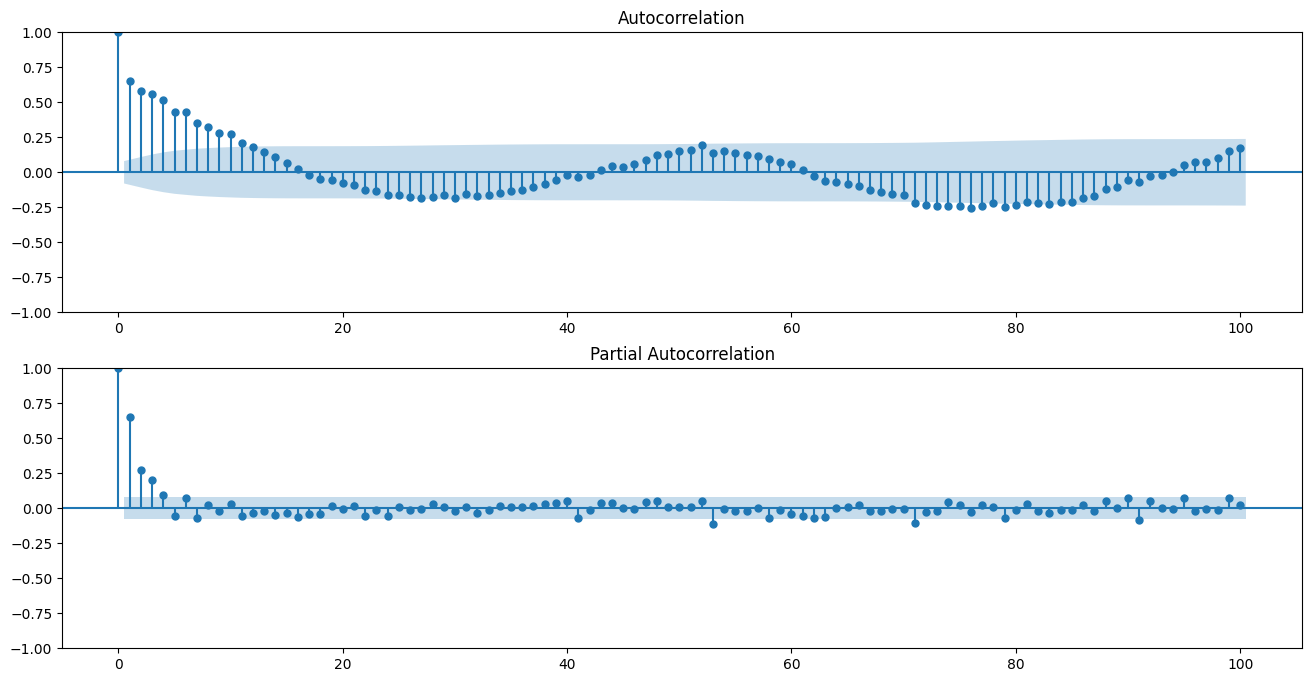

In [138]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(data['depth_to_groundwater_diff_1'], lags=100, ax=ax[0])
plot_pacf(data['depth_to_groundwater_diff_1'], lags=100, ax=ax[1])

plt.show()

In [139]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = data['date']
y = data['depth_to_groundwater']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

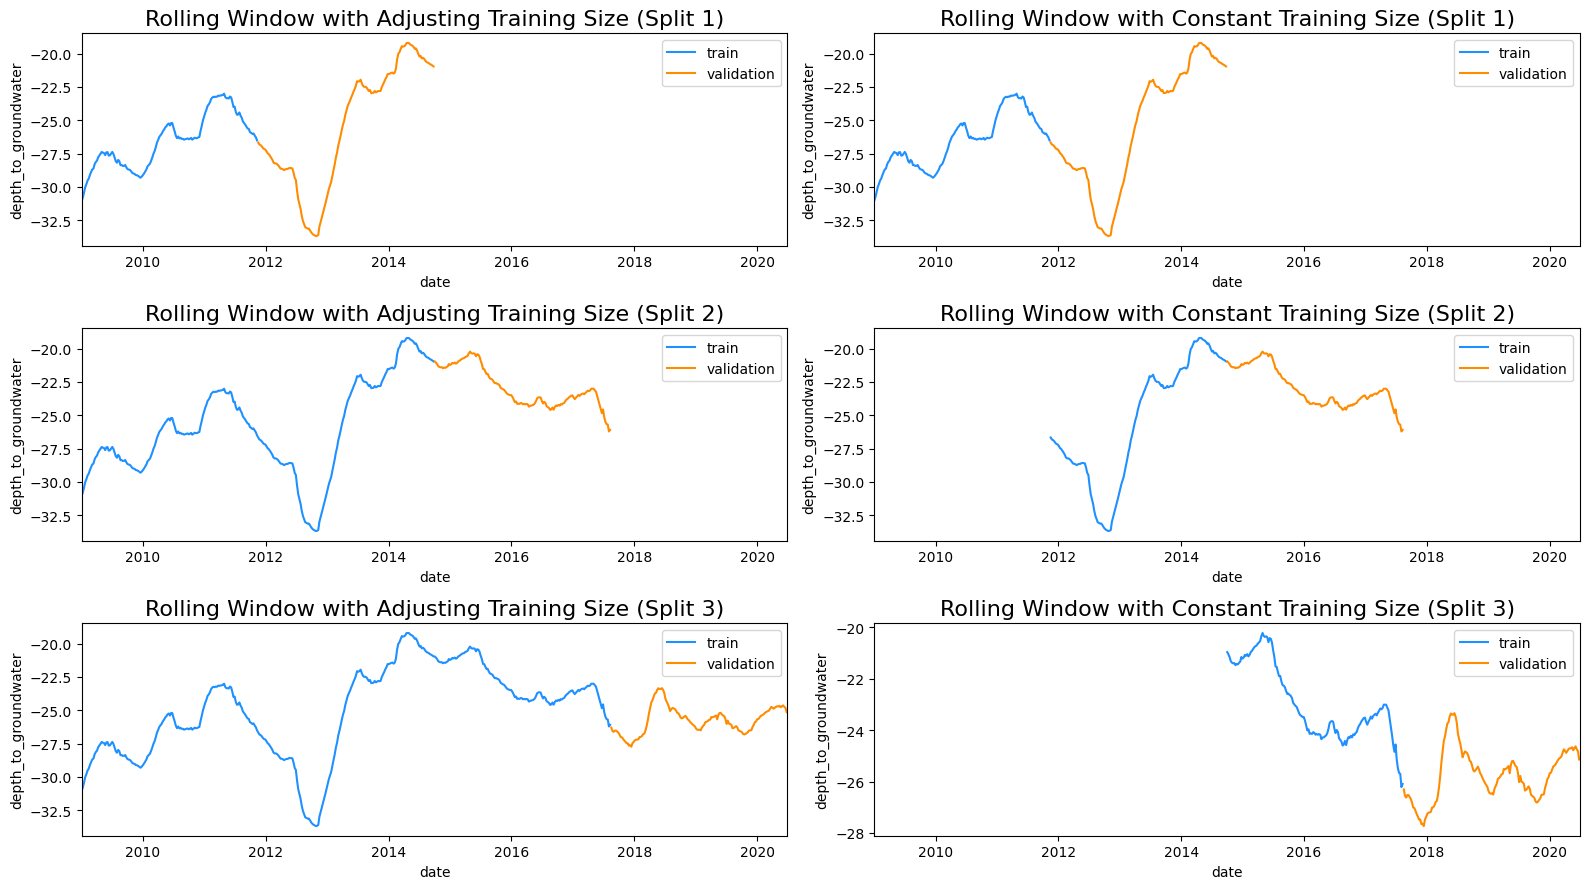

In [140]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i, 1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

La idea detrás de este gráfico es entender qué conjunto de entrenamiento y prueba estamos utilizando para ajustar el modelo en cada iteración.



a este punto estaba interesado en realizar un ARIMA sin embargo hemos tenido problemas te compatibilidad por lo cual me voy a animar a probar la libreria fbprohet de Facebook

In [141]:
features = [
    'rainfall',
    'temperature',
    'drainage_volume',
    'river_hydrometry',
]
target = ['depth_to_groundwater']

train_size = int(0.85 * len(data))

data_multivariante = data[['date'] + target + features].copy()
data_multivariante.columns = ['ds', 'y'] + features

train = data_multivariante.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(data_multivariante.iloc[:train_size, [0,2,3,4,5]]), pd.DataFrame(data_multivariante.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(data_multivariante.iloc[train_size:, [0,2,3,4,5]]), pd.DataFrame(data_multivariante.iloc[train_size:, 1])

train.head()

,ds,y,rainfall,temperature,drainage_volume,river_hydrometry
0,2009-01-01,-31.048571,0.000000,1.657143,-28164.918857,2.371429
1,2009-01-08,-30.784286,0.285714,4.571429,-29755.789714,2.314286
2,2009-01-15,-30.420000,0.028571,7.528571,-25463.190857,2.300000
3,2009-01-22,-30.018571,0.585714,6.214286,-23854.422857,2.500000
4,2009-01-29,-29.790000,1.414286,5.771429,-25210.532571,2.500000


In [146]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 47.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [150]:
pip install colorama

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [151]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from colorama import Fore, init
init()

model = Prophet()
model.add_regressor('rainfall')
model.add_regressor('temperature')
model.add_regressor('drainage_volume')
model.add_regressor('river_hydrometry')

model.fit(train)

y_pred = model.predict(x_valid)

score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

00:31:58 - cmdstanpy - INFO - Chain [1] start processing


00:31:59 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 1.008340094135162


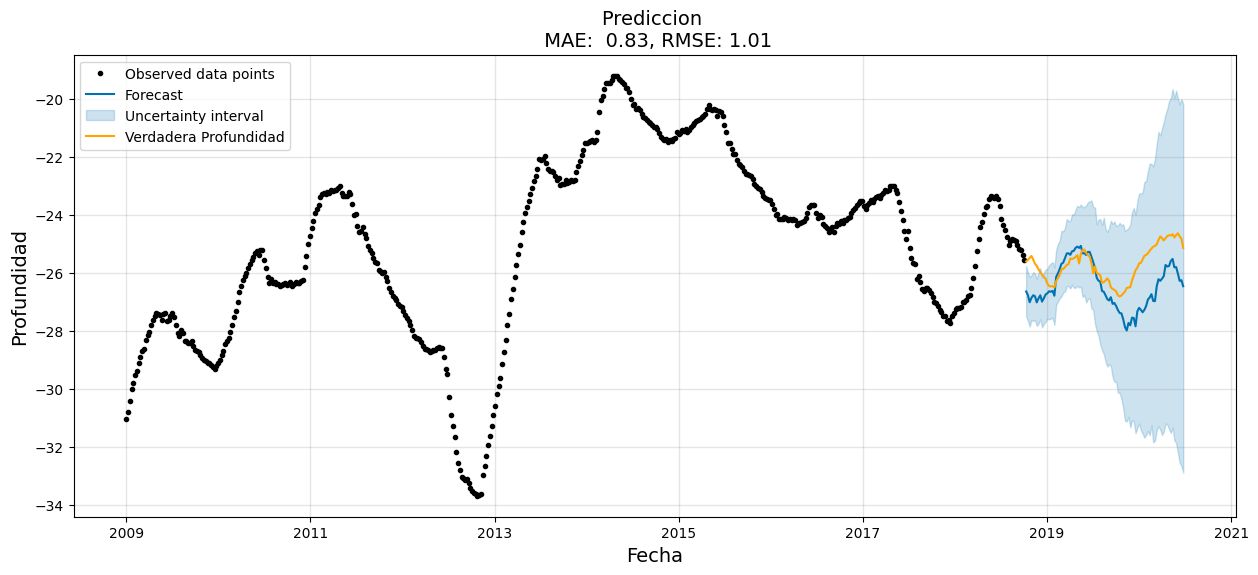

In [154]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred,ax=ax)
sns.lineplot(x=x_valid['ds'],y=y_valid['y'], ax=ax, color='orange', label='Verdadera Profundidad')

ax.set_title(f'Prediccion \n MAE: {score_mae: .2f}, RMSE: {score_rmse:.2f}', fontsize = 14)
ax.set_xlabel(xlabel='Fecha', fontsize=14)
ax.set_ylabel(ylabel='Profundidad', fontsize=14)

plt.show()

El modelo tiene resultados decentes, faltaria compararlo con un ARIMA y posiblemente con algun modelo que involucre Redes Neuronales sin embargo podemos concluir que un valor de RMSE de 1.008 es bastante bueno ya que mide la diferencia promedio de las predicciones con los valores reales.